In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
data=pd.read_csv('car data.csv')
print(data.shape)
data.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


From the dataset preview, Selling_Price is the dependent variable and the rest are independent variables

## Checking if there are any missing values

In [3]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing values in the dataset

## Checking cardinality of independent categorical variables in the dataset

In [4]:
print('Unique elements in Seller_Type are',data['Seller_Type'].unique())
print('Unique elements in Fuel_Type are',data['Fuel_Type'].unique())
print('Unique elements in Transmission are',data['Transmission'].unique())
print('Unique elements in Owner are',data['Owner'].unique())
print('Unique elements in Year are',data['Year'].unique())

Unique elements in Seller_Type are ['Dealer' 'Individual']
Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are [0 1 3]
Unique elements in Year are [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [5]:
print('Unique elements in Car_Name are',data['Car_Name'].nunique())
#98 unique elements 
#so, rather than encoding it, we can just drop this columbn as it doesn' make sense

Unique elements in Car_Name are 98


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Feature Engineering

Dropping the Car_Name Column

In [7]:
dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
dataset['Present_Year']=2022
dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Number_of_Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


So, we can now safely drop 'Year' and 'Present_Year' columns 

In [9]:
dataset.drop(labels=['Year', 'Present_Year'],axis=1,inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


## Encoding the Categorical Variables

In [10]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=dataset[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=dataset[['Seller_Type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=dataset[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)

dataset.drop(labels=['Fuel_Type', 'Seller_Type', 'Transmission'], axis=1, inplace=True)

dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [11]:
dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_Years_Old', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

Now, the encoding has been done 

In [12]:
# Dataset Correlation
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_Years_Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## Data Visualization and Correlation

<AxesSubplot:>

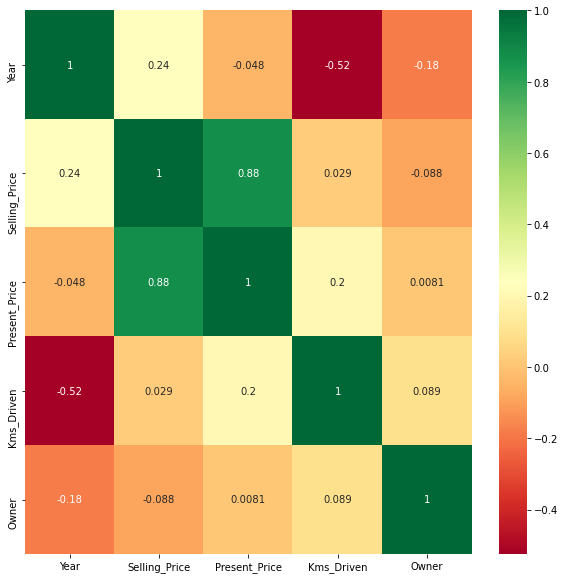

In [13]:
#Correlations of features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
sell=dataset['Selling_Price']
dataset.drop(['Selling_Price'], axis=1, inplace=True)
dataset=dataset.join(sell)
dataset.head()

,Present_Price,Kms_Driven,Owner,Number_of_Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,5.59,27000,0,8,0,1,0,1,3.35
1,9.54,43000,0,9,1,0,0,1,4.75
2,9.85,6900,0,5,0,1,0,1,7.25
3,4.15,5200,0,11,0,1,0,1,2.85
4,6.87,42450,0,8,1,0,0,1,4.60


In [15]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

[0.41018857 0.0410211  0.00134049 0.07929378 0.21009365 0.00836526
 0.12828323 0.12141393]


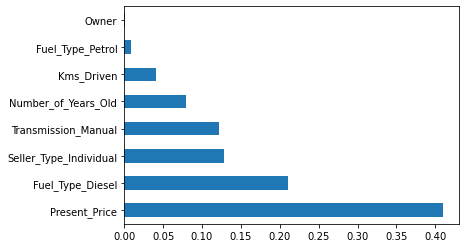

In [16]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [18]:
X

array([[5.5900e+00, 2.7000e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.5400e+00, 4.3000e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.8500e+00, 6.9000e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 8.7934e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2500e+01, 9.0000e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.9000e+00, 5.4640e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=3)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Decision Tree Regressor

Decision Tree Score on Training set is 1.0
Decision Tree Score on Test Set is 0.916727846049827
[0.91735978 0.84528972 0.69863646 0.97123705 0.91636849]
Accuracy: 86.98 %
Standard Deviation: 9.45 %
Mean Absolute Error: 0.8543956043956044
Mean Squared Error: 2.490341758241758
RMSE: 1.578081670333243
The r2_score is 0.916727846049827


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


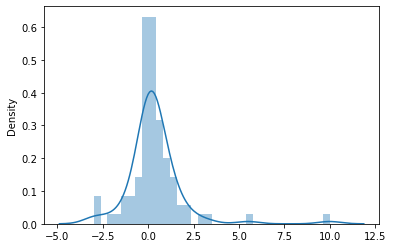

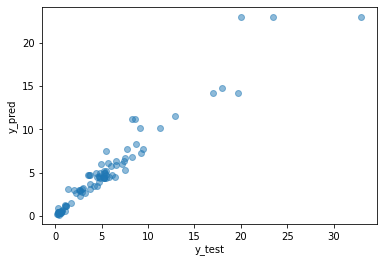

In [22]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Dump the model selected as a Pickle File

In [24]:
import pickle
pickle.dump(dt_reg, open("car.pkl", "wb"))

# load model from file
model = pickle.load(open("car.pkl", "rb"))

model.predict([[5.59, 27000, 0, 3, 0, 1, 0, 1]])

array([3.35])